In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Breast Cancer dataset (Binary classification: Malignant (0) vs Benign (1))
cancer = datasets.load_breast_cancer()
X = cancer.data  # Features (569 samples, 30 features)
Y = cancer.target.reshape(-1, 1)  # Labels (569, 1) -> Binary (0 or 1)

# Normalize features (Standardization)
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Shape: (569, 30)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#reshape to  n features, m examples
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

print(X_train.shape)
print(X_test.shape)  
print(Y_train.shape)
print(Y_test.shape)  

(30, 455)
(30, 114)
(1, 455)
(1, 114)


In [2]:
#Logistic Regression
import sys
import os
sys.path.append(os.path.abspath(".."))
from models.LogisticRegression import LogisticRegressionBinaryClassifier

lr_model = LogisticRegressionBinaryClassifier(n_inputs=X_train.shape[0])
lr_model.fit(X_train, Y_train, learning_rate=0.01, n_iters=1500)
predictions = lr_model.predict(X_test)

accuracy = np.mean(predictions == Y_test)
print(f'Accuracy: {accuracy}')

Cost after iteration 0: 0.6926594758932569
Cost after iteration 10: 0.5443037147812213
Cost after iteration 20: 0.45841885071729066
Cost after iteration 30: 0.4026460986739484
Cost after iteration 40: 0.3632733926382983
Cost after iteration 50: 0.3337968734461116
Cost after iteration 60: 0.31076110606881757
Cost after iteration 70: 0.29216385568573455
Cost after iteration 80: 0.276764900944118
Cost after iteration 90: 0.2637544222097097
Cost after iteration 100: 0.25258052485255233
Cost after iteration 110: 0.24285352211627212
Cost after iteration 120: 0.23428991798354823
Cost after iteration 130: 0.22667813782837304
Cost after iteration 140: 0.21985676075966473
Cost after iteration 150: 0.21370023921466055
Cost after iteration 160: 0.20810926369065816
Cost after iteration 170: 0.2030040991606297
Cost after iteration 180: 0.19831987450881325
Cost after iteration 190: 0.19400318650219123
Cost after iteration 200: 0.19000960760693303
Cost after iteration 210: 0.18630182731613107
Cost aft

In [3]:
from models.FNN1Layer import FNN1LayerBinaryClassifier

fnn_model = FNN1LayerBinaryClassifier(input_dim=X_train.shape[0], nunits=10, dropout=0.2)
fnn_model.fit(X_train, Y_train, learning_rate=0.01, n_iters=1500)
predictions = fnn_model.predict(X_test)

accuracy = np.mean(predictions == Y_test)
print(f'Accuracy: {accuracy}')


Cost after iteration 0: 0.6474271377105939
Cost after iteration 10: 0.6017075334629972
Cost after iteration 20: 0.5611461897120974
Cost after iteration 30: 0.5262120173442808
Cost after iteration 40: 0.5152007776326224
Cost after iteration 50: 0.4850978320133933
Cost after iteration 60: 0.45602178579502134
Cost after iteration 70: 0.43795192203312877
Cost after iteration 80: 0.4311987964439424
Cost after iteration 90: 0.4088240456609027
Cost after iteration 100: 0.390955432319088
Cost after iteration 110: 0.3740157122511437
Cost after iteration 120: 0.3865004956572672
Cost after iteration 130: 0.3470853999655353
Cost after iteration 140: 0.36366992976275164
Cost after iteration 150: 0.3498535719370775
Cost after iteration 160: 0.33508815353749977
Cost after iteration 170: 0.3109967276149094
Cost after iteration 180: 0.32391344067821337
Cost after iteration 190: 0.31739361556810525
Cost after iteration 200: 0.2880303106691026
Cost after iteration 210: 0.3055917376435961
Cost after itera

Cost after epoch 0: 0.6926228003694421
Accuracy: 0.9912280701754386


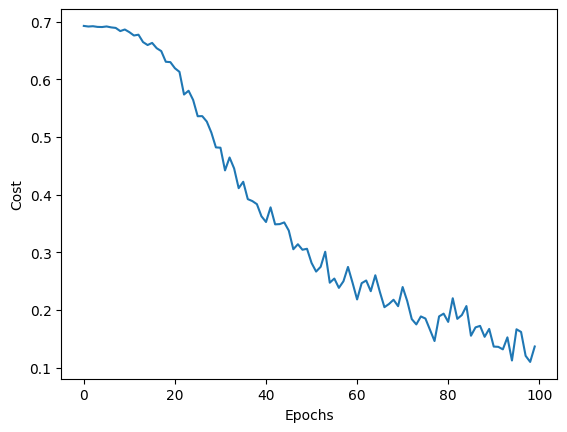

In [4]:
from models.FNN import FNNClassifier
import matplotlib.pyplot as plt

fnn_model = FNNClassifier(X_train.shape[0], 1, [3, 5], ["relu", "tanh"], lamdb_reg=0.01)
costs = fnn_model.fit_mini_batch(X_train, Y_train, optimizer="adam", learning_rate=0.001, num_epochs=100, batch_size=124)
predictions = fnn_model.predict(X_test)

plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')

accuracy = np.mean(predictions == Y_test)
print(f'Accuracy: {accuracy}')

Test Accuracy: 100.00%


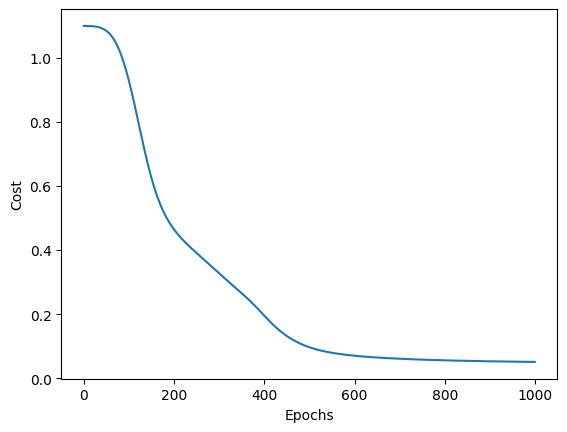

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from models.FNN import FNNClassifier


# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (150 samples, 4 features)
Y = iris.target.reshape(-1, 1)  # Labels (150, 1)

Y = np.eye(3)[Y.flatten()] # One-hot encode Y with eye

# Normalize the features (Standardization)
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Keeps values around mean 0 and std 1

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#reshape to  n features, m examples
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

model = FNNClassifier(X_train.shape[0], Y_train.shape[0], [16, 8], ["relu", "relu"], lamdb_reg=0.01)
costs = model.fit(X_train, Y_train, optimizer="adam", learning_rate=0.001, n_iters=1000, verbose=False)

plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')

Y_pred = model.predict(X_test)
Y_true_classes = np.argmax(Y_test, axis=0)

# Calculate accuracy
accuracy = np.mean(Y_pred == Y_true_classes) * 100
print(f"Test Accuracy: {accuracy:.2f}%")
